In [12]:
# Standard Method for static captcha url
import requests
import shutil

http_proxy  = "http://proxy.xxx.com:8080/"
https_proxy = "http://proxy.xxx.com:8080/"
proxyDict = { 
    "http":http_proxy, 
    "https":https_proxy              
}

rs = requests.session()
res = rs.get('http://bsr.twse.com.tw/bshtm/CaptchaImage.aspx?guid=a7f3e499-893a-4ff3-9618-1ae4e39020fb', stream=True, verify=False, proxies=proxyDict)

f=open('dailyReportCAPTCHA.jpg', 'wb')
shutil.copyfileobj(res.raw, f)
f.close()

import IPython.display
IPython.display.Image('dailyReportCAPTCHA.jpg')

<div style="text-align:center;margin:5px;"><img border="0" height="60" src="CaptchaImage.aspx?guid=cb4651a6-813f-4659-99d8-c3adf999ed3f" width="200"/></div>


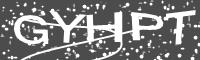

In [10]:
# Solution for non-static captcha url
# The image you're trying to download doesn't have a static url.
# (http://bsr.twse.com.tw/bshtm/CaptchaImage.aspx?guid=a7f3e499-893a-4ff3-9618-1ae4e39020fb)
# This means you can't use a static url for referencing the image
# (res = rs.get('http://bsr.twse.com.tw/bshtm/CaptchaImage.aspx?guid=a7f3e499-893a-4ff3-9618-1ae4e39020fb') won't work).

# Here's my solution using Requests and BeautifulSoup: (source: https://stackoverflow.com/questions/41754219/download-a-captcha-image-without-an-extension)
# see HowtoGetdynamicCAPTCHAUrl01.png, HowtoGetdynamicCAPTCHAUrl02.png, HowtoGetdynamicCAPTCHAUrl03.png

import requests
from mimetypes import guess_extension
from bs4 import BeautifulSoup

#from urllib.parse import urljoin
'''
ImportError                               Traceback (most recent call last)
<ipython-input-16-0ce9287f3757> in <module>()
     10 from bs4 import BeautifulSoup
     11 
---> 12 from urllib.parse import urljoin
     13 
     14 

ImportError: No module named parse
'''
# If you need to write code which is Python2 and Python3 compatible you can use the following import
try:
    from urllib.parse import urljoin
except ImportError:
     from urlparse import urljoin

http_proxy  = "http://proxy.xxx.com:8080/"
https_proxy = "http://proxy.xxx.com:8080/"
proxyDict = { 
    "http":http_proxy, 
    "https":https_proxy              
}

s = requests.session()
r = s.get('http://bsr.twse.com.tw/bshtm/', stream=True, verify=False, proxies=proxyDict)
#print(r.content)
'''
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
    <title>TAIWAN STOCK EXCHANGE.買賣日報表查詢系統</title>

    <style type="text/css">
        body {
            margin: 0;
            padding: 0;
            border: 0;
            overflow: hidden;
            height: 100%;
            max-height: 100%;
        }
    </style>
</head>
<frameset cols="300,*" border="0">
   <frame id="page1" name="page1" src="bsMenu.aspx">
   <frame id="page2" name="page2" src="bsWelcome.aspx">
</frameset>
</html>
'''

r = s.get('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', stream=True, verify=False, proxies=proxyDict)
#print(r.content) # this is what we want

captchaImageName = ''
if r.status_code == 200:            
    soup = BeautifulSoup(r.content, "html.parser")
    #div = soup.find("div", attrs={"class": "captcha", "style": "color:Red;width:100%;"})
    div = soup.find("div", attrs={"style": "text-align:center;margin:5px;"})
    
    print(div)
    '''
    <div style="text-align:center;margin:5px;">
        <img border="0" height="60" src="CaptchaImage.aspx?guid=0d1a504b-aeef-4b62-982f-f6b0bdcd0df3" width="200"/>
    </div>
    '''
        
    r = s.get(urljoin("http://bsr.twse.com.tw/bshtm/", div.img["src"]), stream=True, verify=False, proxies=proxyDict)
    if r.status_code == 200:
        guess = guess_extension(r.headers['content-type'])
        if guess:
            #with open("DynamicCaptcha" + guess, "wb") as f:
            with open("DynamicCaptcha" + ".jpg", "wb") as f:
                f.write(r.content)
                #captchaImageName = "DynamicCaptcha" + guess
                captchaImageName = "DynamicCaptcha" + ".jpg"
            # Image.open(BytesIO(r.content)).show()

import IPython.display
IPython.display.Image(captchaImageName)

In [11]:
import requests
'''
payload = {
    '__VIEWSTATE': '/wEPDwUJOTAxMjkxMjg3D2QWAgIDD2QWBAIBD2QWAmYPZBYEZg9kFgJmDxAPFgYeB0NoZWNrZWRnHglGb3JlQ29sb3IKAB4EXyFTQgIEZGRkZAIBD2QWAgIBDw8WBB8BCgAfAgIEZGQCAw9kFgQCAw8PFgIeBFRleHRlZGQCCQ8PFgYeC05hdmlnYXRlVXJsBRB+L2JzQ29udGVudC5hc3B4HwMFD+S4i+i8iSA1NDM0IENTVh4HVmlzaWJsZWdkZBgCBR5fX0NvbnRyb2xzUmVxdWlyZVBvc3RCYWNrS2V5X18WAwUSUmFkaW9CdXR0b25fTm9ybWFsBRBSYWRpb0J1dHRvbl9FeGNkBRBSYWRpb0J1dHRvbl9FeGNkBQ9DYXB0Y2hhQ29udHJvbDEPBSQzYzJkYzZiNi05ODgyLTRjZmMtODk1Ni0wYzkyNTc3NzQ0YWRkDKBfdKUf9NPnTbbxijlfbg==',
    '__VIEWSTATEGENERATOR': 'AA1F01CB',
    '__EVENTVALIDATION': '/wEdAAY+1/fUT0D4eDDq8wPhy/n7fMmuxAJNAJcNkRRsVeJwwqKURZav/+YrVMqaWE2hvMxJwK4Ohf3nRgXHkFhQen1PRSciNdPYWmINCrip1wqw01PJCA0uL9aE2sjICZqv6GpbLa5fJ7IK5PNDHfzLIezF',
    'RadioButton_Normal': 'RadioButton_Normal',
    'TextBox_Stkno': '2493',
    'CaptchaControl1': 'ETCE6',
    'btnOK': '查詢',
}
'''

# BECAUSE __VIEWSTATE and __EVENTVALIDATION will change all the time, we need to inquiry what these two parameters is
import re #Regular expression operations
from bs4 import BeautifulSoup

http_proxy  = "http://proxy.xxx.com:8080/"
https_proxy = "http://proxy.xxx.com:8080/"
proxyDict = { 
    "http":http_proxy, 
    "https":https_proxy              
}

# The following block is not working
'''
def get_hiddenvalue(url):
    resChangedParam = s.get(url, stream=True, verify=False, proxies=proxyDict)
    __VIEWSTATE = re.search('id="__VIEWSTATE" value="(.*?)"', resChangedParam.content).group(1)
    __EVENTVALIDATION = re.search('id="__EVENTVALIDATION" value="(.*?)"', resChangedParam.content).group(1)
    return __VIEWSTATE, __EVENTVALIDATION

(__VIEWSTATE, __EVENTVALIDATION) = get_hiddenvalue('http://bsr.twse.com.tw/bshtm/bsMenu.aspx')
print(__VIEWSTATE)
print(__EVENTVALIDATION)

payload = {
    '__VIEWSTATE': __VIEWSTATE,
    '__VIEWSTATEGENERATOR': 'AA1F01CB',
    '__EVENTVALIDATION': __EVENTVALIDATION,
    'RadioButton_Normal': 'RadioButton_Normal',
    'TextBox_Stkno': '2493',
    'CaptchaControl1': '26U9K',
    'btnOK': '%E6%9F%A5%E8%A9%A2',
}
'''

# The following block is working
payload = {
    #'__EVENTTARGET':'',
    #'__EVENTARGUMENT':'',
    #'__LASTFOCUS':'',    
    'RadioButton_Normal':'RadioButton_Normal',
    'TextBox_Stkno':'5434',
    'CaptchaControl1':'GYHPT',
    'btnOK':'查詢'
}
# Hidden Value 擷取
for inp in soup.select('input[type==hidden]'):
    payload[inp['id']] = inp['value']


In [12]:
print(payload)

resMenu = s.post('http://bsr.twse.com.tw/bshtm/bsMenu.aspx', data=payload, stream=True, verify=False, proxies=proxyDict)
print(resMenu.text)
resContent = s.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx?v=t', stream=True, verify=False, proxies=proxyDict)
print(resContent.text)
resContent2 = s.get('http://bsr.twse.com.tw/bshtm/bsContent.aspx', stream=True, verify=False, proxies=proxyDict)
print(resContent2.text)

import csv
import codecs #resolve issue for chinese gibberish
with open('stockDailyReport-{}.csv'.format('5434'), 'w') as f:
    f.write(codecs.BOM_UTF8)
    writer = csv.writer(f)
    reader = csv.reader(resContent2.text.encode('utf-8').splitlines())    
    for row in reader:
        writer.writerow(row)       

{u'__VIEWSTATE': u'/wEPDwUJOTAxMjkxMjg3D2QWAgIDD2QWBAIBD2QWAmYPZBYEZg9kFgJmDxAPFgYeB0NoZWNrZWRnHglGb3JlQ29sb3IKAB4EXyFTQgIEZGRkZAIBD2QWAgIBDw8WBB8BCgAfAgIEZGQCAw9kFgQCAw8PFgIeBFRleHRlZGQCCQ8PFgIeB1Zpc2libGVoZGQYAgUeX19Db250cm9sc1JlcXVpcmVQb3N0QmFja0tleV9fFgMFElJhZGlvQnV0dG9uX05vcm1hbAUQUmFkaW9CdXR0b25fRXhjZAUQUmFkaW9CdXR0b25fRXhjZAUPQ2FwdGNoYUNvbnRyb2wxDwUkY2I0NjUxYTYtODEzZi00NjU5LTk5ZDgtYzNhZGY5OTllZDNmZIFsXugF7/Iqte+qdqEjP70=', 'RadioButton_Normal': 'RadioButton_Normal', u'__VIEWSTATEGENERATOR': u'AA1F01CB', 'CaptchaControl1': 'GYHPT', u'__EVENTVALIDATION': u'/wEdAAZmFFHK7Mx0htC5SQ1adHMNfMmuxAJNAJcNkRRsVeJwwqKURZav/+YrVMqaWE2hvMxJwK4Ohf3nRgXHkFhQen1PRSciNdPYWmINCrip1wqw01PJCA0uL9aE2sjICZqv6GoaxnDPMEsU6hsOYTYog22T', 'btnOK': '\xe6\x9f\xa5\xe8\xa9\xa2', 'TextBox_Stkno': '5434'}



<html xmlns="http://www.w3.org/1999/xhtml">
<head><title>
	未命名頁面
</title>
    <style type="text/css">
        body {
            margin: 0;
            padding: 0;
            border: 0;
            overflow:



<html xmlns="http://www.w3.org/1999/xhtml">
<head><title>

</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><link id="ssLayout" rel="stylesheet" type="text/css" href="./BSR_Style.css" /></head>
<body bottommargin="0" leftmargin="0" topmargin="0" rightmargin="0">
    <form method="post" action="bsContent.aspx?v=t" id="form1">
<input type="hidden" name="__VIEWSTATE" id="__VIEWSTATE" value="/wEPDwUKLTgxNDI2MzM4MGRkOCeVH5iuNhKRRTu7K+3m5A==" />

<input type="hidden" name="__VIEWSTATEGENERATOR" id="__VIEWSTATEGENERATOR" value="23969AED" />
        <span id="sp_HtmlCode"><html><head></head><body><table border=0 cellpadding=0 cellspacing=0><tr><td align =center>  <table border='0' cellpadding='0' cellspacing='0' width='600px'>     <tr><td align='center'>       <table cellpadding='2' cellspacing='0' border='1' bordercolordark='#FFFFFF' bordercolorlight='#363636' bgcolor='#FFFFFF' width='100%'> 
    <tr>  
     <td class='column_title'> 
          交易日期</td> 
       